In [12]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [180]:
conn = sqlite3.connect("data.db")
act = pd.read_sql_query("select rowid, * from actors where valid=1;", conn)
n_hits = np.array(act[['tothitsexp0', 'tothitsexp1', 'tothitsexp2']])
keypress = np.array(act[['keydowns0', 'keydowns1', 'keydowns2']])
# act

In [133]:
def exp_format(x, pos=None):
    names = {1: 'Delay',
            2: 'Delay + predictor',
            3: 'No delay'}
    return names[x]

def game_format(x, pos=None):
    names = {1: 'Delay',
             2: 'Delay\ngamer',
            3: 'Delay\npredictor',
            4: 'Delay\npredictor\ngamer',
            5: 'No delay',
            6: 'No delay\ngamer'}
    return names[x]

def times_format(x, pos=None):
    names = {1: 'Daily',
            2: 'Weekly',
            3: 'Monthly',
            4: 'Yearly',
            5: 'Never'}
    return names[x]

## Performance

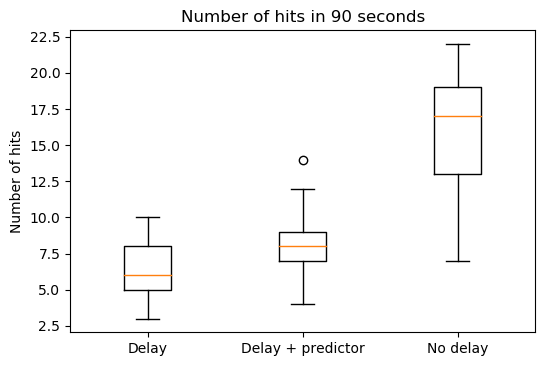

In [134]:
fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Number of hits in 90 seconds')
ax1.boxplot(n_hits)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
plt.ylabel('Number of hits')
plt.show()

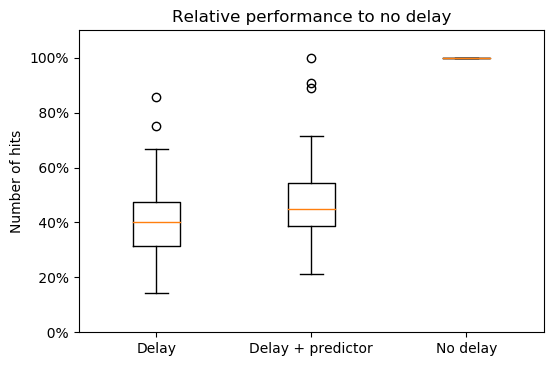

In [183]:
rel = n_hits.astype(float)
for row in rel:
    de = row[2]
    row[0]=row[0]/de
    row[1]=row[1]/de
    row[2]=row[2]/de

fig, ax = plt.subplots(dpi=100)
ax.set_title('Relative performance to no delay')
ax.boxplot(rel)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
ax.set_ylim([0,1.1])
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
plt.ylabel('Number of hits')
plt.show()

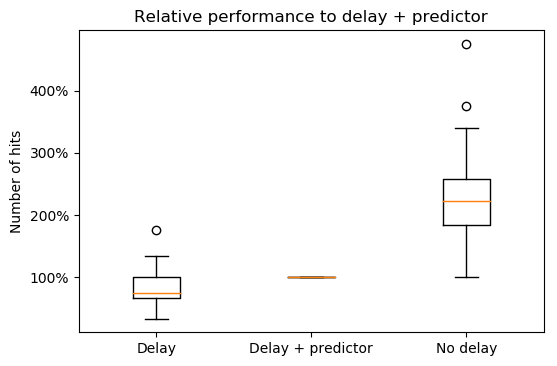

In [184]:
rel = n_hits.astype(float)
for row in rel:
    de = row[1]
    row[0]=row[0]/de
    row[1]=row[1]/de
    row[2]=row[2]/de

fig, ax = plt.subplots(dpi=100)
ax.set_title('Relative performance to delay + predictor')
ax.boxplot(rel)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
# ax.set_ylim([0,1.1])
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
plt.ylabel('Number of hits')
plt.show()

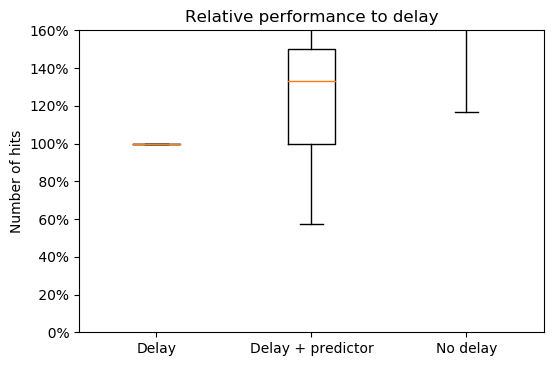

In [188]:
rel = n_hits.astype(float)
for row in rel:
    de = row[0]
    row[0]=row[0]/de
    row[1]=row[1]/de
    row[2]=row[2]/de

fig, ax = plt.subplots(dpi=100)
ax.set_title('Relative performance to delay')
ax.boxplot(rel)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
ax.set_ylim([0,1.6])
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
plt.ylabel('Number of hits')
plt.show()

## Performance of gamers

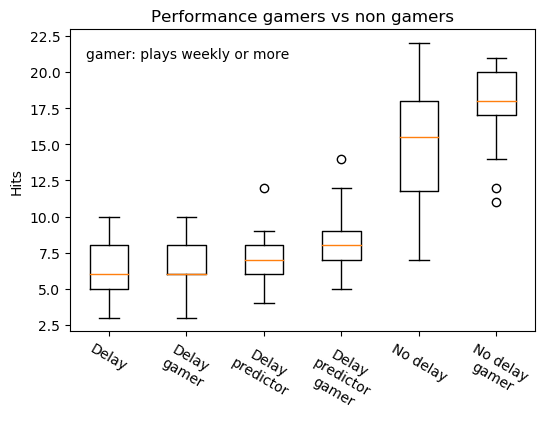

In [136]:
gamers = pd.read_sql_query("select rowid, * from actors where valid=1 and game<=1;", conn)
ga = np.array(gamers[['tothitsexp0', 'tothitsexp1', 'tothitsexp2']])
non_gamers = pd.read_sql_query("select rowid, * from actors where valid=1 and game >1;", conn)
no = np.array(non_gamers[['tothitsexp0', 'tothitsexp1', 'tothitsexp2']])

fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Performance gamers vs non gamers')
ax1.boxplot([no[...,0], ga[...,0], no[...,1], ga[...,1], no[...,2], ga[...,2]])
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(game_format))
plt.ylabel('Hits')
plt.text(0.7, 21, 'gamer: plays weekly or more', fontsize=10)
plt.xticks(rotation=-30)
plt.show()

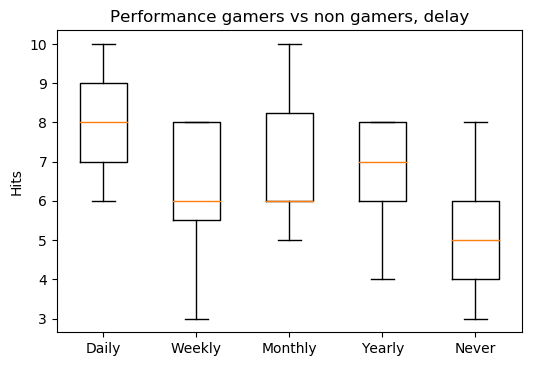

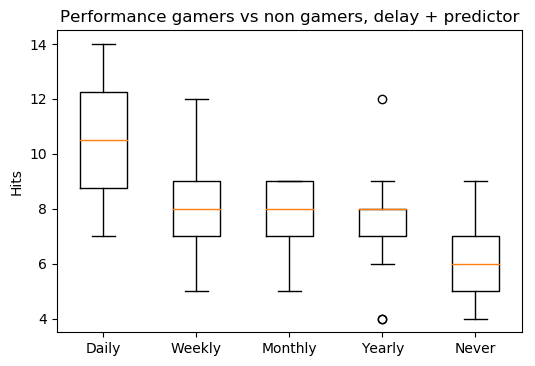

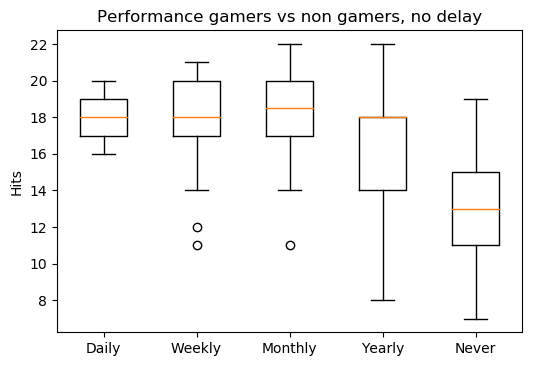

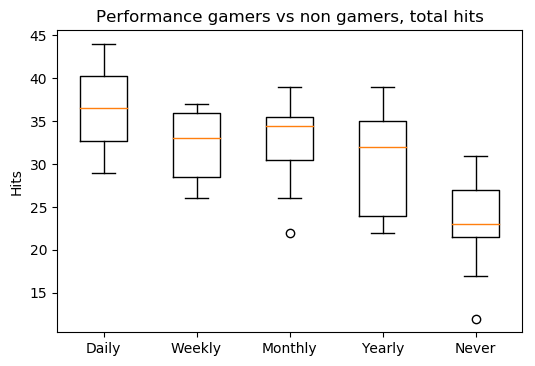

In [137]:
g0 = pd.read_sql_query("select rowid, * from actors where valid=1 and game== 0;", conn)
g0h = np.array(g0[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])
g1 = pd.read_sql_query("select rowid, * from actors where valid=1 and game== 1;", conn)
g1h = np.array(g1[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])
g2 = pd.read_sql_query("select rowid, * from actors where valid=1 and game== 2;", conn)
g2h = np.array(g2[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])
g3 = pd.read_sql_query("select rowid, * from actors where valid=1 and game== 3;", conn)
g3h = np.array(g3[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])
g4 = pd.read_sql_query("select rowid, * from actors where valid=1 and game== 4;", conn)
g4h = np.array(g4[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])

titles = ['delay', 'delay + predictor', 'no delay', 'total hits']
for i, title  in enumerate(titles):
    exp = i
    fig1, ax1 = plt.subplots(dpi=100)
    ax1.set_title('Performance gamers vs non gamers, {}'.format(title))
    ax1.boxplot([g0h[...,exp], g1h[...,exp], g2h[...,exp], g3h[...,exp], g4h[...,exp]])
    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(times_format))
    plt.ylabel('Hits')
    plt.show()

## Predictor help

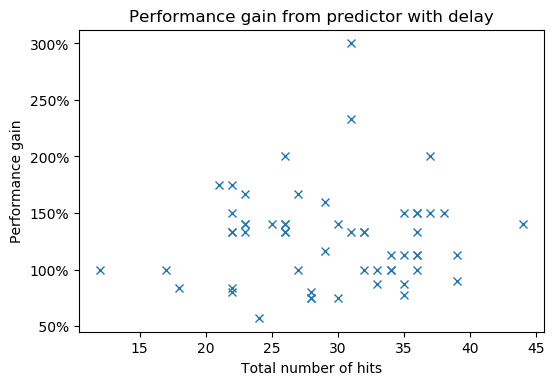

Participants perform on average 28% better with predictor display with the same delay
65% of the participants performed better with the predictor display, while 21% performed worse with the predictor


In [215]:
hits = np.array(act[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']])
rel = hits.astype(float)

li = []
gain_li = []
gained = 0
lost = 0
for row in rel:
    gain = row[1]/row[0]
    li.append([gain, row[3]])
    gain_li.append(gain)
    if gain > 1.0:
        gained += 1
    elif gain < 1.0:
        lost += 1
        
gain_per = (gained/len(gain_li))*100
lost_per = (lost/len(gain_li))*100
res = np.array(li)

fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Performance gain from predictor with delay')
ax1.plot(res[...,1], res[...,0], 'x')
plt.ylabel('Performance gain')
ax1.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax1.get_yticks()])
plt.xlabel('Total number of hits')
plt.show()
np.average(gain)
print('Participants perform on average {:.0f}% better with predictor display with the same delay'
      .format((np.average(gain_li)-1)*100))
print('''{:.0f}% of the participants performed better with the predictor display, while {:.0f}% performed worse with the predictor'''.format(gain_per, lost_per))

## Keypresses

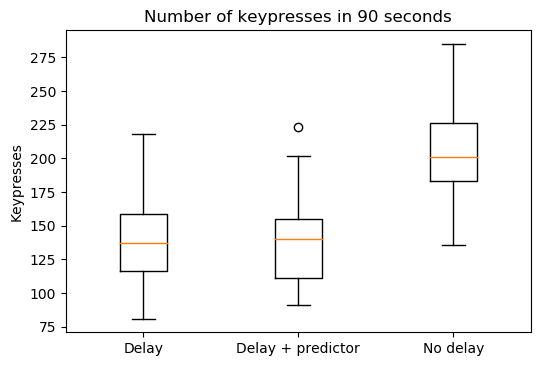

In [179]:
fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Number of keypresses in 90 seconds')
ax1.boxplot(keypress)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
plt.ylabel('Keypresses')
plt.show()